In [ ]:
# 3 Observations

# 1) The most obvious correlation is that of temperature vs latitude. While it looks like 
#    Latitude in Southern Hemisphere has a positive correlation with Max Temp and Latitude
#    in Northern Hemisphere has a negative correlation, this is not really true. If you would
#    orient them both from either pole to equator (positive correlation) or equator to pole 
#    (negative correlation), you would see they would have the same correlation orientation.

# 2) There is no real correlation between humidity and latitude. It would be interesting to 
#    plot humidity and distance from coast and see if there is a correlation there.

# 3) There does not seem to be a correlation between wind and latitude, but there does seem
#    to be two peaks around the 40 and -40 degrees latitude. These two areas both fall into
#    the Westerlies of the global wind patterns

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
# create a dataframe with cities from the random list generated
city_weather = pd.DataFrame(cities,columns=['City'])
city_weather.head()

,City
0,hermanus
1,port alfred
2,takab
3,griffith
4,alice springs


In [5]:
# create and append empty columns to city_weather dataframe
city_weather['Lat'] = ''
city_weather['Lng'] = ''
city_weather['Max Temp'] = ''
city_weather['Humidity'] = ''
city_weather['Cloudiness'] = ''
city_weather['Wind Speed'] = ''
city_weather['Country'] = ''
city_weather['Date'] = ''

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,,,,,,,,
1,port alfred,,,,,,,,
2,takab,,,,,,,,
3,griffith,,,,,,,,
4,alice springs,,,,,,,,


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&q="

In [7]:
print(f'Beginning Data Retrieval')
print(f'-------------------------------------')

record = 0
set_count = 1

for index, row in city_weather.iterrows():
    
    record = record + 1

    
    city_name = row['City']
    
    weather_response = requests.get(query_url + city_name)
    weather_json = weather_response.json()
    
    
    try:
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        city_weather.loc[index, 'Lat'] = weather_json['coord']['lat']
        city_weather.loc[index, 'Lng'] = weather_json['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        city_weather.loc[index, 'Humidity'] = weather_json['main']['humidity']
        city_weather.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        city_weather.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        city_weather.loc[index, 'Country'] = weather_json['sys']['country']
        city_weather.loc[index, 'Date'] = weather_json['dt']
        
    except (KeyError, IndexError):
        
        print(f'City not found. Skipping...')
    if record == 50:
        set_count = set_count+1
        record = 0

print(f'-------------------------------------')
print(f'Data Retrieval Complete')
print(f'-------------------------------------')    

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | takab
Processing Record 4 of Set 1 | griffith
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | jumla
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | ugoofaaru
Processing Record 17 of Set 1 | sinnamary
Processing Record 18 of Set 1 | alyangula
Processing Record 19 of Set 1 | tezu
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | hobart
Process

Processing Record 38 of Set 4 | kapaa
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | ekhabi
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | olafsvik
Processing Record 43 of Set 4 | basoko
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | la asuncion
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | manggar
Processing Record 49 of Set 4 | halalo
City not found. Skipping...
Processing Record 50 of Set 4 | reo
Processing Record 1 of Set 5 | huangpi
Processing Record 2 of Set 5 | mitu
Processing Record 3 of Set 5 | roald
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | dorogino
Processing Record 6 of Set 5 | porto murtinho
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | tromso
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 of Set 5 | lebu
Processing Record 11 

Processing Record 14 of Set 12 | yatou
Processing Record 15 of Set 12 | miles city
Processing Record 16 of Set 12 | cap-aux-meules
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | ishigaki
Processing Record 19 of Set 12 | nyrob
Processing Record 20 of Set 12 | troitsko-pechorsk
Processing Record 21 of Set 12 | cazaje
City not found. Skipping...
Processing Record 22 of Set 12 | kenai
Processing Record 23 of Set 12 | viligili
City not found. Skipping...
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | niono
Processing Record 27 of Set 12 | north platte
Processing Record 28 of Set 12 | ternate
Processing Record 29 of Set 12 | halifax
Processing Record 30 of Set 12 | muleba
Processing Record 31 of Set 12 | coquimbo
Processing Record 32 of Set 12 | calbuco
Processing Record 33 of Set 12 | puerto escondido
Processing Record 34 of Set 12 | blois
Processing Record 35 of Set 12 | rawson


In [8]:
city_weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,278.71,93,69,2.44,ZA,1597795174
1,port alfred,-33.59,26.89,285.88,67,100,13.56,ZA,1597795174
2,takab,36.4,47.11,289.08,63,0,2.41,IR,1597795174
3,griffith,41.53,-87.42,295.37,43,1,5.1,US,1597795175
4,alice springs,-23.7,133.88,289.15,25,0,4.1,AU,1597794946


In [9]:
# convert columns to appropriate format, and convert Max Temp from Kelvin to Fahrenheit

city_weather['Lat'] = pd.to_numeric(city_weather['Lat'])
city_weather['Lng'] = pd.to_numeric(city_weather['Lng'])
city_weather['Max Temp'] = pd.to_numeric(city_weather['Max Temp'])
city_weather['Max Temp'] = (((city_weather['Max Temp'] - 273.15) * (9/5)) + 32)
city_weather['Humidity'] = pd.to_numeric(city_weather['Humidity'])
city_weather['Cloudiness'] = pd.to_numeric(city_weather['Cloudiness'])
city_weather['Wind Speed'] = pd.to_numeric(city_weather['Wind Speed'])
city_weather['Date'] = pd.to_datetime(city_weather['Date'], unit = 's')

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,42.008,93.0,69.0,2.44,ZA,2020-08-18 23:59:34
1,port alfred,-33.59,26.89,54.914,67.0,100.0,13.56,ZA,2020-08-18 23:59:34
2,takab,36.40,47.11,60.674,63.0,0.0,2.41,IR,2020-08-18 23:59:34
3,griffith,41.53,-87.42,71.996,43.0,1.0,5.10,US,2020-08-18 23:59:35
4,alice springs,-23.70,133.88,60.800,25.0,0.0,4.10,AU,2020-08-18 23:55:46


In [10]:
#convert date to month day year and save to a variable to use in chart titles
city_weather['Date'] = pd.to_datetime(city_weather['Date'])
city_weather['Date'] = city_weather['Date'].dt.strftime('%m-%d-%Y')

date = city_weather.loc[1,"Date"]

In [11]:
#convert wind speed from meters per second to mph for every 1 m/s = 2.237 mph

city_weather['Wind Speed'] = city_weather['Wind Speed']*2.237

In [12]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,42.008,93.0,69.0,5.45828,ZA,08-18-2020
1,port alfred,-33.59,26.89,54.914,67.0,100.0,30.33372,ZA,08-18-2020
2,takab,36.40,47.11,60.674,63.0,0.0,5.39117,IR,08-18-2020
3,griffith,41.53,-87.42,71.996,43.0,1.0,11.40870,US,08-18-2020
4,alice springs,-23.70,133.88,60.800,25.0,0.0,9.17170,AU,08-18-2020


In [13]:
# Remove blank rows and save to csv

city_weather_clean = city_weather.dropna(how = 'any')
city_weather_clean.to_csv("output_data/city_weather_clean.csv", index = False)

#check length
len(city_weather_clean['City'])

578

In [14]:
#check for humidity values over 100
Humidity_over_100 = city_weather_clean.loc[city_weather_clean['Humidity'] > 100]

Humidity_over_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
# no cities have humidity over 100%, so need to do any removal

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

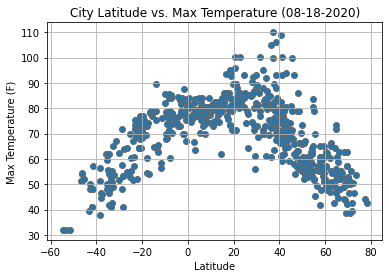

In [23]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Max Temp']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# save figure out to output_data folder as png
plt.savefig('output_data/fig_1_lat_vs_temp.png')

plt.show()

## Latitude vs. Humidity Plot

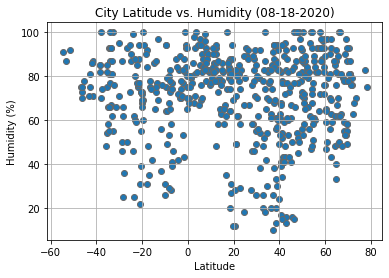

In [24]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Humidity']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# save figure out to output_data folder as png
plt.savefig('output_data/fig_2_lat_vs_humid.png')

plt.show()

## Latitude vs. Cloudiness Plot

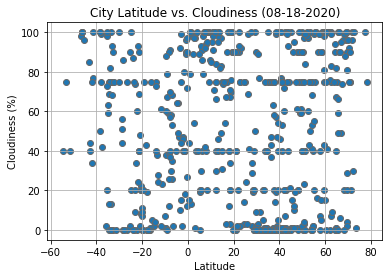

In [25]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Cloudiness']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# save figure out to output_data folder as png
plt.savefig('output_data/fig_3_lat_vs_cloud.png')

plt.show()

## Latitude vs. Wind Speed Plot

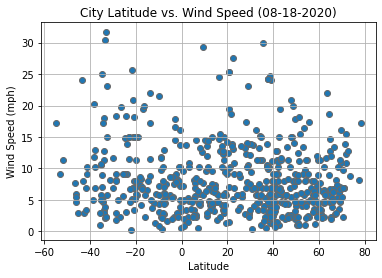

In [26]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Wind Speed']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# save figure out to output_data folder as png
plt.savefig('output_data/fig_4_lat_vs_wind.png')

plt.show()

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hemi = city_weather_clean.loc[city_weather_clean['Lat'] > 0]

Southern_Hemi = city_weather_clean.loc[city_weather_clean['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5019930866219592


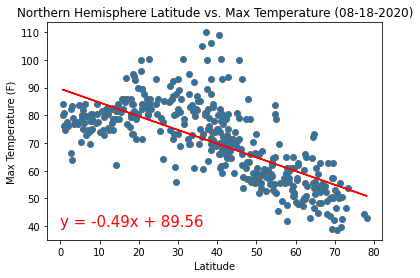

In [28]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Max Temp']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Northern Hemisphere Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (0,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_5_north_lat_vs_temp.png')

plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7035285386600449


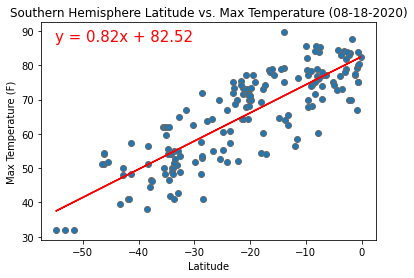

In [41]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Max Temp']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Southern Hemisphere Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-55,87), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_6_south_lat_vs_temp.png')

plt.show()

In [ ]:
# There seems to be somewhat of correlation of max temp and latitude (positive correlation in Southern Hemisphere and negative correlation in Northern Hemisphere)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0026183570511040047


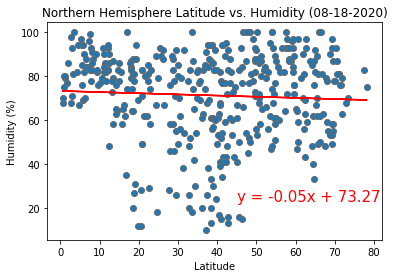

In [30]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Humidity']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (45,23), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_7_north_lat_vs_humid.png')


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019985491198163216


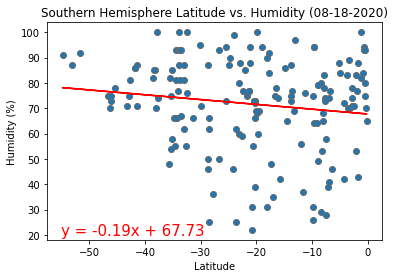

In [39]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Humidity']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-55,20), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_8_south_lat_vs_humid.png')

plt.show()

In [ ]:
# No correlation in either the Northern or Southern hemisphere for latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009782496887867237


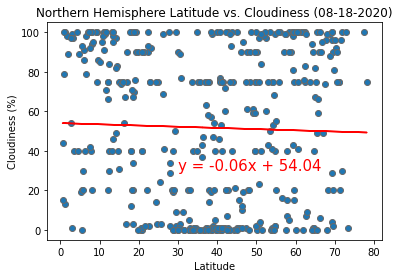

In [32]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Cloudiness']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (30,30), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_9_north_lat_vs_cloud.png')


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03576542674276054


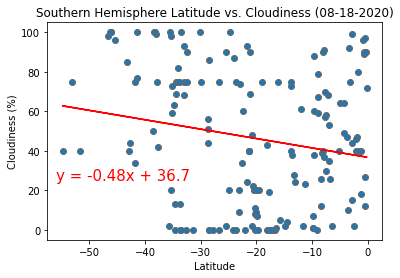

In [38]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Cloudiness']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-56,25), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_10_south_lat_vs_cloud.png')

plt.show()

In [ ]:
# No correlation in either the Northern or Southern hemisphere for latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011494147502225725


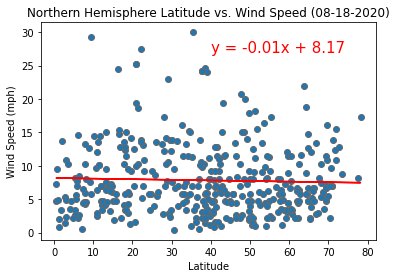

In [35]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Wind Speed']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (40,27), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_11_north_lat_vs_wind.png')


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025219134516909786


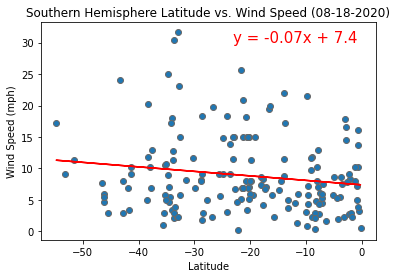

In [42]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Wind Speed']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-23,30), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue**2}")

# save figure out to output_data folder as png
plt.savefig('output_data/fig_12_south_lat_vs_wind.png')

plt.show()

In [ ]:
# No correlation in either the Northern or Southern hemisphere for latitude and wind speed